In [1]:
# Operations Optimization Dashboard

In [2]:
# 1️⃣ Import libraries
import pandas as pd
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 2️⃣ Load data from Excel
file_path = r"D:\personal\bdas.spyberpolymath.com\project\data\Operations_Optimization.xlsx"
df = pd.read_excel(file_path)

In [4]:
# Preview data
df.head()

,ResourceID,AvailableHours,TaskLoad,Efficiency
0,1,102,37,0.76
1,2,92,129,0.80
2,3,14,191,0.52
3,4,106,187,0.80
4,5,71,20,0.59


In [5]:
# 3️⃣ Optimization setup
# Goal: Maximize total efficiency while meeting task load constraints

# For linear programming in scipy:
# linprog minimizes, so we will minimize negative efficiency

In [6]:
c = -df['Efficiency'].values       # Coefficients for objective function (-efficiency to maximize)
A = np.array([df['TaskLoad'].values])  # Constraint: total task load ≤ available hours
b = np.array([df['AvailableHours'].sum()])

bounds = [(0, df.loc[i, 'TaskLoad']) for i in range(len(df))]  # Each resource can be assigned 0 to TaskLoad

# Solve linear programming problem
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

In [7]:
# 4️⃣ Results
df['OptimizedTaskLoad'] = res.x
df['TaskCompletionRatio'] = df['OptimizedTaskLoad'] / df['TaskLoad']

print("Optimized Task Allocation:")
print(df)

Optimized Task Allocation:
    ResourceID  AvailableHours  TaskLoad  Efficiency  OptimizedTaskLoad  \
0            1             102        37        0.76          21.540541   
1            2              92       129        0.80           0.000000   
2            3              14       191        0.52           0.000000   
3            4             106       187        0.80           0.000000   
4            5              71        20        0.59          20.000000   
5            6              20       160        0.53           0.000000   
6            7             102        57        0.97           0.000000   
7            8             121        21        0.98          21.000000   
8            9              74        88        0.90           0.000000   
9           10              87        48        0.65           0.000000   
10          11             116        58        0.55           0.000000   
11          12              99       169        0.84           0.000000  

C:\Users\amana\AppData\Local\Temp\ipykernel_15784\263481914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ResourceID', y='OptimizedTaskLoad', data=df, palette='viridis')


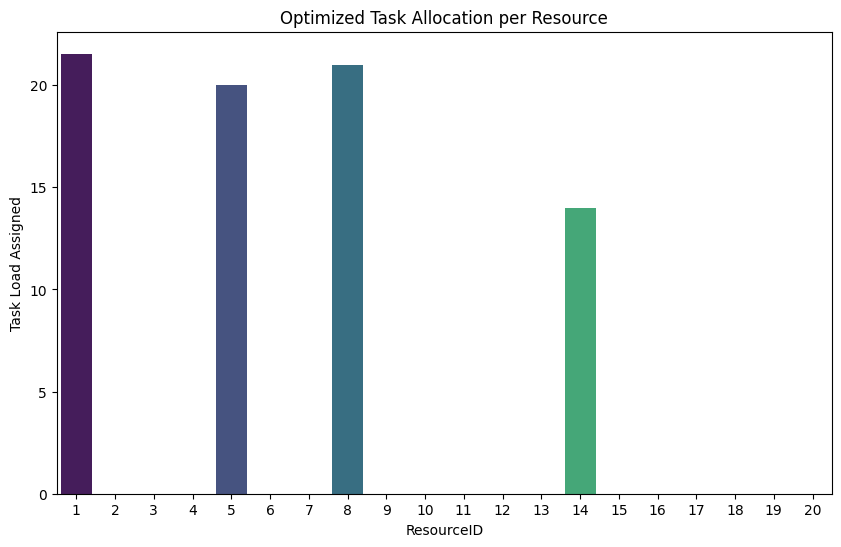

In [8]:
# 5️⃣ Visualization
plt.figure(figsize=(10,6))
sns.barplot(x='ResourceID', y='OptimizedTaskLoad', data=df, palette='viridis')
plt.title("Optimized Task Allocation per Resource")
plt.ylabel("Task Load Assigned")
plt.show()